In [80]:
import pandas as pd
import numpy as np
import os
os.chdir('D:\/Downloads-D')
data = pd.read_csv('proctatinium_data.csv')
t_values = np.array(data["time"], dtype=float)
count_values = np.array(data["count_rate"], dtype=float)

In [81]:
data

,time,count_rate
0,0,32
1,5,28
2,10,29
3,15,28
4,20,25
...,...,...
78,390,1
79,395,1
80,400,2
81,405,2


In [82]:
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as sts

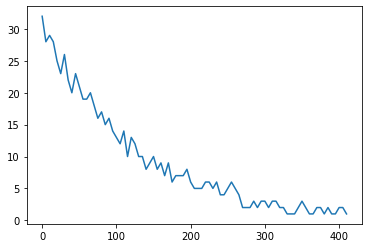

In [83]:
x_axis = data['time']
y_axis = data['count_rate']
plt.plot(x_axis, y_axis)

In [84]:
def given_function(x, lamb):
    return 32 * np.exp(-lamb * x)

In [85]:
lambda_list = [0]
for i in range(10000): #10000 trials
    #noisy data
    y_axis = y_axis + np.random.normal(0,1, size=len(y_axis))
    estimate = optimize.curve_fit(given_function, x_axis, y_axis, lambda_list[0])
    lambda_list.append(estimate[0][0])

In [86]:
lambda_list

[0,
 0.008561777469659486,
 0.008334729237011293,
 0.008458015633021563,
 0.0086070310244892,
 0.008305096540086435,
 0.008263901149851607,
 0.00815100400754697,
 0.008189507157381188,
 0.008372843044522314,
 0.008434203665738516,
 0.008559811930502596,
 0.008578560515903182,
 0.008604181992927196,
 0.008672387477953757,
 0.008720341324086698,
 0.008671669045400919,
 0.008540916261924469,
 0.008354312452394243,
 0.00842401569436878,
 0.008513571025067798,
 0.008597065150881454,
 0.00851497298533835,
 0.008452808139321146,
 0.008426255432318354,
 0.008423822956508975,
 0.008301366954702157,
 0.008507718342163946,
 0.00862631914402249,
 0.008692800124800136,
 0.00870826244697486,
 0.008684756577286196,
 0.008557199948565469,
 0.008521346944443918,
 0.008551657071533226,
 0.0085341435374698,
 0.008581433468538766,
 0.008691413963898964,
 0.008843818933505485,
 0.008814785757817856,
 0.008859292661335416,
 0.009031653292610178,
 0.009063876918282083,
 0.008842316478372813,
 0.0088926464009

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.900e+02, 1.649e+03,
        3.222e+03, 3.532e+03, 1.055e+03, 1.520e+02]),
 array([0.        , 0.00158161, 0.00316322, 0.00474482, 0.00632643,
        0.00790804, 0.00948965, 0.01107126, 0.01265287, 0.01423447,
        0.01581608]),
 <a list of 10 Patch objects>)

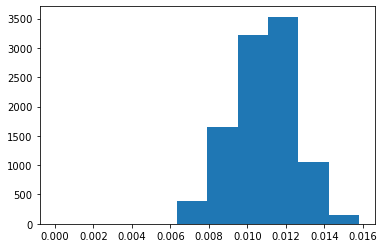

In [87]:
plt.hist(lambda_list)

In [92]:
#error:
lst_error = []
for i in lambda_list[1:]:
    lst_error.append((np.log(2)/i)-1.17*60)

In [93]:
lst_error

[10.758327054897492,
 12.963731040229618,
 11.75151329039619,
 10.332668999073519,
 13.260460358806554,
 13.676509168117533,
 14.838257853653886,
 14.43844859518964,
 12.585163519029123,
 11.982883889282036,
 10.776917038321741,
 10.599940651461182,
 10.35933511514817,
 9.725762348835104,
 9.286244264933103,
 9.732384057894933,
 10.956067956081682,
 12.768788216832604,
 12.082275545058039,
 11.216737878735856,
 10.42602392734888,
 11.203332899993057,
 11.802000889566244,
 12.06040453288712,
 12.084158171244539,
 13.297956943985582,
 11.27274659114336,
 10.152601032649457,
 9.538078709808389,
 9.396496405633243,
 9.61192960235384,
 10.801634264271783,
 11.142443287312773,
 10.854136614913514,
 11.020473679242727,
 10.572889879197945,
 9.550795835871085,
 8.17645543984446,
 8.434603222794323,
 8.039562350733206,
 6.546433693052393,
 6.273587054326498,
 8.189772889863832,
 7.746108425697486,
 8.028110306379517,
 7.325844278454824,
 7.426979020042651,
 8.965704961109381,
 9.241570444231655

(array([ 157.,  783., 1874., 2375., 1815., 1058.,  726.,  296.,  684.,
         232.]),
 array([-26.37453356, -21.37433003, -16.37412651, -11.37392298,
         -6.37371946,  -1.37351593,   3.62668759,   8.62689112,
         13.62709464,  18.62729817,  23.62750169]),
 <a list of 10 Patch objects>)

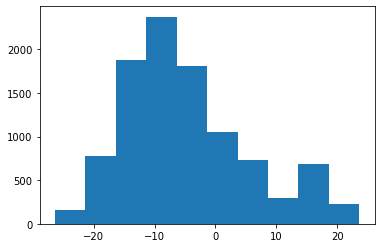

In [94]:
plt.hist(lst_error)